In [2]:
# Import Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Pasion et al dataset.csv')

In [4]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [5]:
print(df.shape)  #return number of shape of data set
print(df.dtypes)#columns and data type

(21045, 17)
Location          object
Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
YRMODAHRMI       float64
Month              int64
Hour               int64
Season            object
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
dtype: object


In [6]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


### Notes:
Hours are between 10 - 15 (10 AM - 3 PM ) , is the time zone same or diffrent 
Altitude can have an impact



### check distribution

In [30]:
## chek distribution of data 
print(df.groupby(['Location','Altitude','Latitude'])['Location'].count().reset_index(name='count').sort_values(['Altitude','Latitude'], ascending=True))


##similar picks based on Latitude, and Altidtude 
#group 1 Peterson, USAFA

       Location  Altitude  Latitude  count
10       Travis         1     38.16   2746
4       Kahului         2     20.89    941
3          JDMT         2     26.98   1779
0   Camp Murray        84     47.11   1113
1       Grissom       239     40.67   1487
5         MNANG       246     44.89    780
8        Offutt       380     41.13    881
7     March AFB       458     33.90   2204
6     Malmstrom      1043     47.52   1517
2    Hill Weber      1370     41.15   2384
9      Peterson      1879     38.82   2640
11        USAFA      1947     38.95   2573


In [31]:
## check data count by season, validate that we have data for each season
print(df.groupby(['Location','Season'])['Location'].count())
print(df.groupby(['Season'])['Altitude'].count())

#TODO need to explain what is each season mean

Location     Season
Camp Murray  Fall       119
             Spring     131
             Summer     559
             Winter     304
Grissom      Fall       265
             Spring     340
             Summer     665
             Winter     217
Hill Weber   Fall       676
             Spring     381
             Summer     961
             Winter     366
JDMT         Fall       358
             Spring     447
             Summer     515
             Winter     459
Kahului      Fall       151
             Spring     482
             Summer      74
             Winter     234
MNANG        Fall       232
             Spring     122
             Summer     316
             Winter     110
Malmstrom    Fall       134
             Spring     554
             Summer     519
             Winter     310
March AFB    Fall       661
             Spring     361
             Summer     837
             Winter     345
Offutt       Fall       123
             Spring     316
             Summer     442


In [32]:
## Check what each season mean , for example what months falling under each season
print(df.groupby(['Season','Month'])['Season'].count())

#Notes: season are diffrent across diffrent geo locatoins 

Season  Month
Fall    9        2244
        10        903
        11       1260
Spring  3        1343
        4        1540
        5        1925
Summer  6        2344
        7        2929
        8        2935
Winter  1        1382
        2        1103
        12       1137
Name: Season, dtype: int64


<Axes: xlabel='PolyPwr', ylabel='Count'>

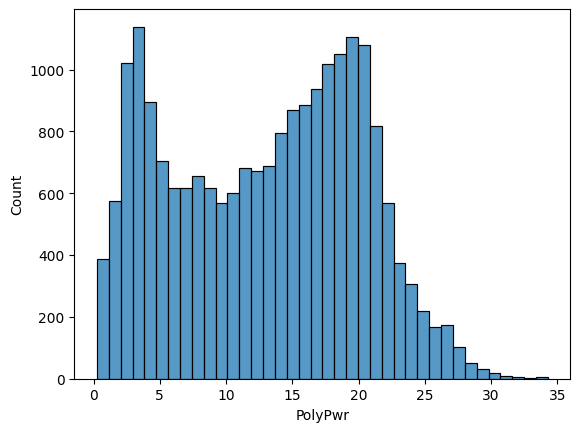

In [36]:
sns.histplot(x="PolyPwr", data=df)

In [63]:
#adding polyPwrCategory
labelspolyPwrRange = ["{0} - {1}".format(i, i + 6) for i in range(0, 35, 7)]
df["polyPwrRange"] = pd.cut(df['PolyPwr'], range(0, 40, 7), right=False, labels=labelspolyPwrRange)
df[5380:5400].head(10)

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,polyPwrRange
5380,JDMT,20170801,1115,26.98,-80.11,2,2.017080e+11,8,11,Summer,52.49023,37.34879,22.40713,6,2.0,1016.5,28,21 - 27
5381,JDMT,20170801,1145,26.98,-80.11,2,2.017080e+11,8,11,Summer,57.26318,36.77475,8.76261,17,1.0,1017.2,26,7 - 13
5382,JDMT,20170801,1200,26.98,-80.11,2,2.017080e+11,8,12,Summer,53.64990,36.82510,10.39874,6,4.0,1016.5,22,7 - 13
5383,JDMT,20170801,1300,26.98,-80.11,2,2.017080e+11,8,13,Summer,57.48291,37.39662,34.26963,9,7.0,1016.5,28,28 - 34
5384,JDMT,20170801,1415,26.98,-80.11,2,2.017080e+11,8,14,Summer,60.42480,35.43282,12.22968,8,2.0,1016.9,26,7 - 13
5385,JDMT,20170801,1430,26.98,-80.11,2,2.017080e+11,8,14,Summer,60.47974,33.60245,10.66536,8,4.0,1016.5,26,7 - 13
5386,JDMT,20170801,1500,26.98,-80.11,2,2.017080e+11,8,15,Summer,59.96094,34.12613,12.86587,10,10.0,1016.5,29,7 - 13
5387,JDMT,20170801,1530,26.98,-80.11,2,2.017080e+11,8,15,Summer,65.25879,32.31339,8.77263,14,10.0,1016.9,60,7 - 13
5388,JDMT,20170802,1000,26.98,-80.11,2,2.017080e+11,8,10,Summer,56.25610,38.06885,21.78662,6,10.0,1019.6,722,21 - 27
5389,JDMT,20170802,1100,26.98,-80.11,2,2.017080e+11,8,11,Summer,47.36938,41.26633,22.98556,7,10.0,1019.6,722,21 - 27


In [65]:
#Export file to CSV with new column

df.to_csv(r'C:\DataScienceResultsCSV\Pasion et al cat dataset.csv', index=False, header=True)

<Axes: xlabel='AmbientTemp'>

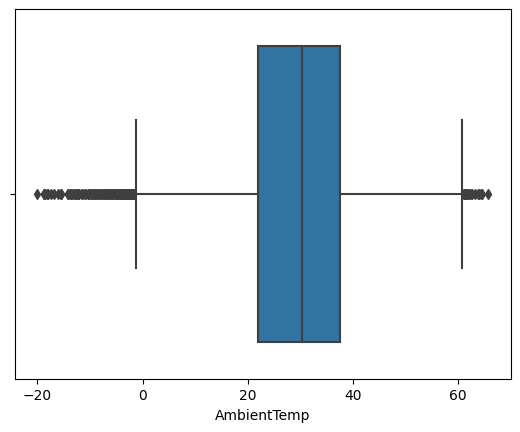

In [33]:
sns.boxplot(x="AmbientTemp", data=df)

<Axes: xlabel='AmbientTemp', ylabel='Count'>

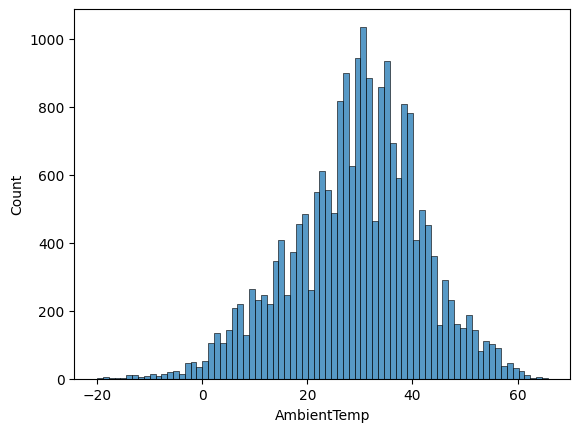

In [34]:
sns.histplot(x="AmbientTemp", data=df)

Altitude
1       2746
2       2720
84      1113
239     1487
246      780
380      881
458     2204
1043    1517
1370    2384
1879    2640
1947    2573
Name: Altitude, dtype: int64
Axes(0.125,0.11;0.775x0.77)


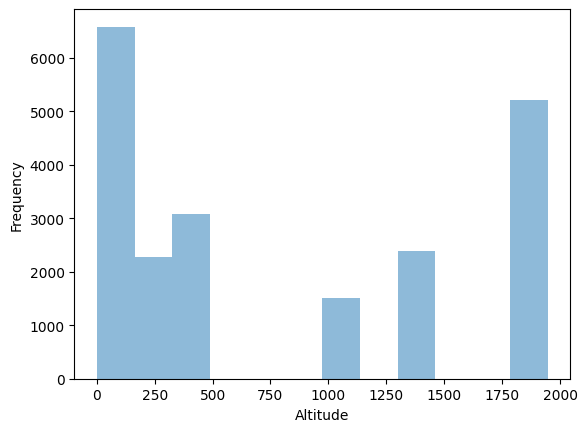

In [12]:
## chek distribution of data 
print(df.groupby(['Altitude'])['Altitude'].count())

altHist = df['Altitude'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Altitude")  
print(altHist)

Humidity
0.00000      52
0.00610       1
0.02441       1
0.03052       1
0.04883       2
           ... 
99.92676      1
99.93286      1
99.93896      1
99.95728      1
99.98779    200
Name: Humidity, Length: 10356, dtype: int64
Axes(0.125,0.11;0.775x0.77)


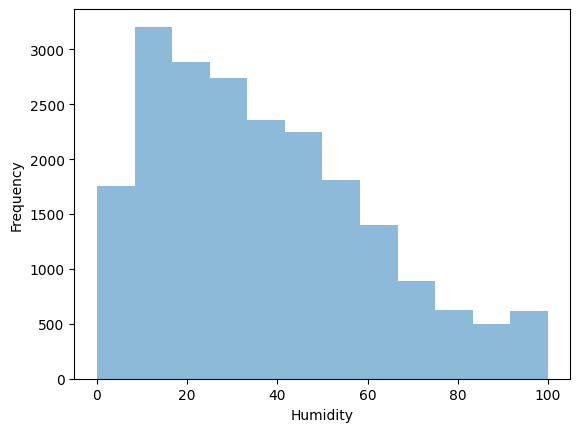

In [13]:
## chek distribution of data 
print(df.groupby(['Humidity'])['Humidity'].count())
humHist = df['Humidity'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Humidity")  
print(humHist)

<Axes: xlabel='Humidity'>

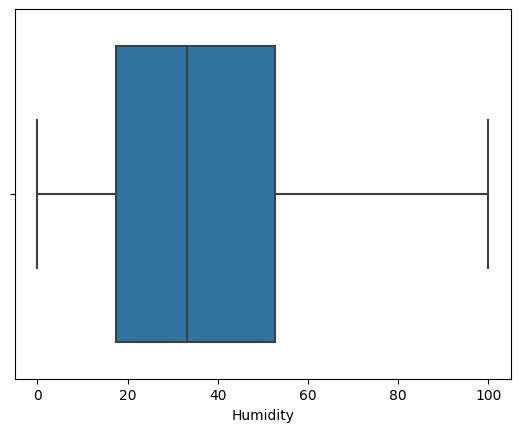

In [14]:
sns.boxplot(x="Humidity", data=df)

In [15]:
print(df.groupby('Location').agg({'AmbientTemp': ['mean', 'min', 'max']}))

#kind of low ?  Double check C vs F 


            AmbientTemp                    
                   mean       min       max
Location                                   
Camp Murray   30.450185   2.67754  59.26788
Grissom       25.569657 -12.28264  49.63264
Hill Weber    30.022489  -5.18021  64.43672
JDMT          36.037962  11.01616  52.29637
Kahului       29.211252  19.98169  43.14957
MNANG         21.628888  -8.98949  41.98891
Malmstrom     15.766080 -19.98177  43.25279
March AFB     31.969279   7.74567  54.22997
Offutt        28.680158  -3.84331  54.18716
Peterson      32.650353  -7.09869  61.83594
Travis        26.107134   5.18517  49.02336
USAFA         33.741510  -3.18619  65.73837


Cloud.Ceiling
0          4
1         10
2         73
3         43
4         49
       ...  
230       53
240       73
250      588
300       35
722    14256
Name: Cloud.Ceiling, Length: 79, dtype: int64
Axes(0.125,0.11;0.775x0.77)


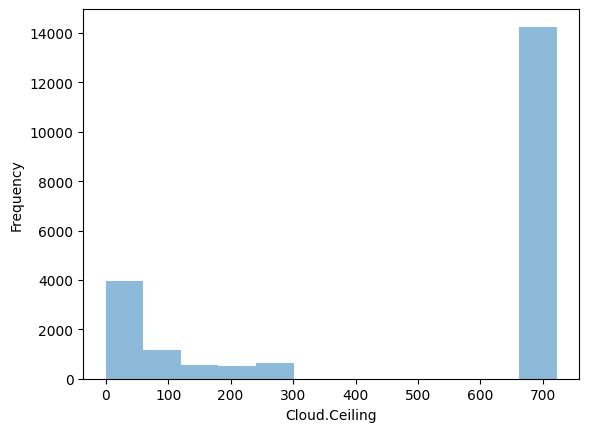

In [16]:
## chek cloud ceiling of data 
print(df.groupby(['Cloud.Ceiling'])['Cloud.Ceiling'].count())
humHist = df['Cloud.Ceiling'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Cloud.Ceiling")  
print(humHist)

Cloud.Ceiling
0         4
1         9
2        38
3        20
4        24
       ... 
220      12
230      17
240      21
250     119
722    2321
Name: Cloud.Ceiling, Length: 77, dtype: int64
Axes(0.125,0.11;0.775x0.77)


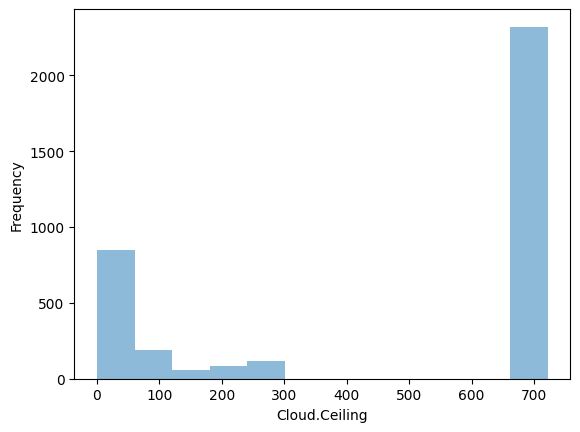

In [28]:
## chek cloud ceiling of data 
tempDF = df[df["Cloud.Ceiling"] < 722]


#tempDF = df[df["Season"] == "Winter" ]
print(tempDF.groupby(['Cloud.Ceiling'])['Cloud.Ceiling'].count())
humHist = tempDF['Cloud.Ceiling'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Cloud.Ceiling")  
print(humHist)

Visibility
0.0        68
0.1         8
0.3        13
0.4         5
0.5        12
0.6         2
0.8        13
0.9         8
1.0        36
1.3        11
1.5        25
1.8         7
2.0        62
2.5        23
3.0        95
4.0       111
5.0       123
6.0       146
6.2         5
6.9         1
7.0       193
8.0       177
8.8         2
9.1       231
10.0    19668
Name: Visibility, dtype: int64
Axes(0.125,0.11;0.775x0.77)


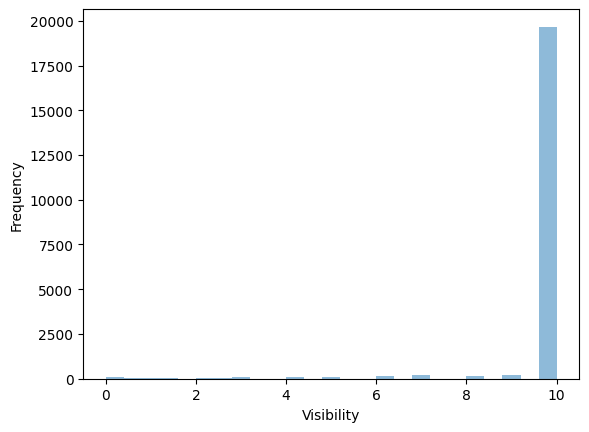

In [18]:
## chek Visiblity distribution of data 
print(df.groupby(['Visibility'])['Visibility'].count())
humHist = df['Visibility'].plot.hist(bins=25, alpha=0.5)
plt.xlabel("Visibility")  
print(humHist)

<Axes: xlabel='Visibility'>

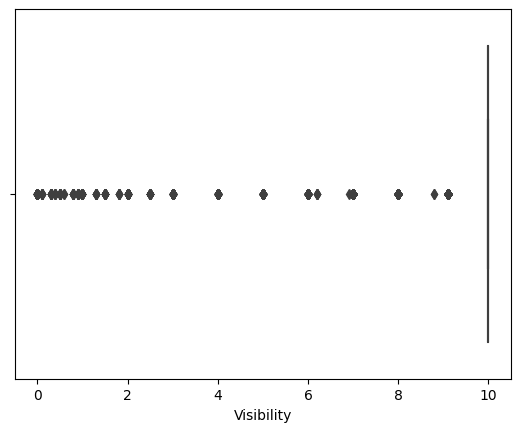

In [19]:
sns.boxplot(x="Visibility", data=df)

Visibility
0.0     68
0.1      8
0.3     13
0.4      5
0.5     12
0.6      2
0.8     13
0.9      8
1.0     36
1.3     11
1.5     25
1.8      7
2.0     62
2.5     23
3.0     95
4.0    111
5.0    123
6.0    146
6.2      5
6.9      1
7.0    193
8.0    177
8.8      2
9.1    231
Name: Visibility, dtype: int64
Axes(0.125,0.11;0.775x0.77)


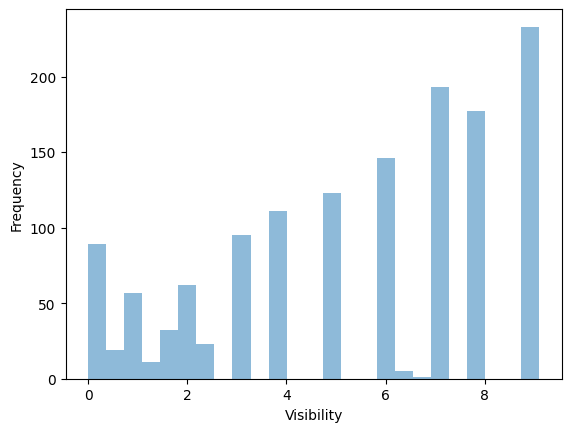

In [23]:
## chek Visiblity distribution filtered of data 
tempDF = df[df["Visibility"] < 10]
print(tempDF.groupby(['Visibility'])['Visibility'].count())
humHist = tempDF['Visibility'].plot.hist(bins=25, alpha=0.5)
plt.xlabel("Visibility")  
print(humHist)

<Axes: xlabel='PolyPwr'>

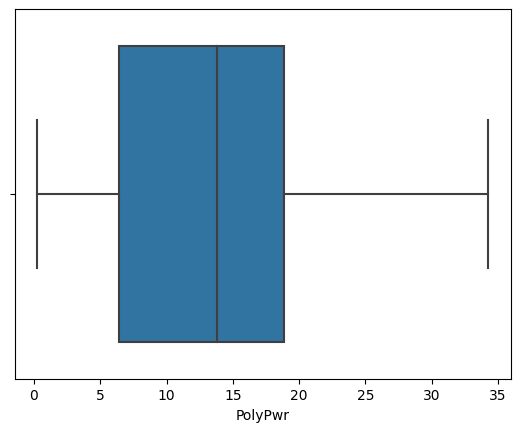

In [21]:
#boxplot for polyPower , cehck for outliers
sns.boxplot(x="PolyPwr", data=df)

In [ ]:
sns.set(style = "white", color_codes = True)
p = sns.lmplot(x='AmbientTemp', y='PolyPwr', data=df, height=8.27, aspect=11.7/8.27, line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
p.fig.suptitle("Ambient Temperature vs Solar Output", fontsize=16, fontdict={"weight": "bold"})
p.set_axis_labels( "Temperature (Celsius)" , "Watts" , size = 14)

In [29]:
##todo  cleanup table here

dfData = df[['Altitude','Humidity','PolyPwr','AmbientTemp','Wind.Speed','Visibility','Pressure','Cloud.Ceiling','Latitude']].copy()
print(dfData.dtypes)

Altitude           int64
Humidity         float64
PolyPwr          float64
AmbientTemp      float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
Latitude         float64
dtype: object


In [30]:
dfData.corr()[['PolyPwr']].sort_values(by='PolyPwr', ascending=False)


,PolyPwr
PolyPwr,1.000000
AmbientTemp,0.580395
Cloud.Ceiling,0.416574
Visibility,0.204905
Pressure,0.073867
Wind.Speed,0.071087
Altitude,-0.077585
Latitude,-0.253049
Humidity,-0.397819


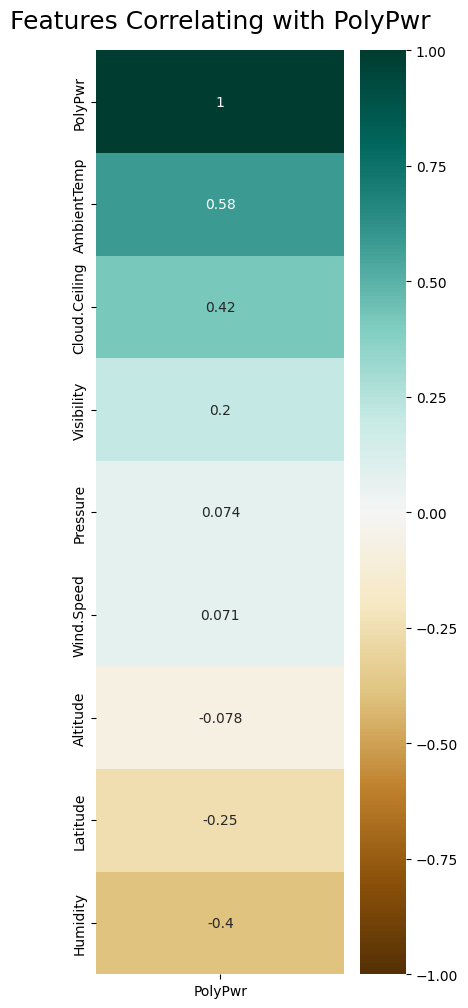

In [31]:

plt.figure(figsize=(4, 12))
heatmap = sns.heatmap(dfData.corr()[['PolyPwr']].sort_values(by='PolyPwr', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with PolyPwr', fontdict={'fontsize':18}, pad=16);

Location
Camp Murray    10.777723
Grissom         9.426174
Hill Weber     14.437151
JDMT           18.574124
Kahului        15.222645
MNANG           9.996263
Malmstrom       9.886024
March AFB      13.761134
Offutt         13.895667
Peterson       11.517351
Travis         13.296735
USAFA          12.845495
Name: PolyPwr, dtype: float64


Text(0.5, 0, 'Power output(Watts)')

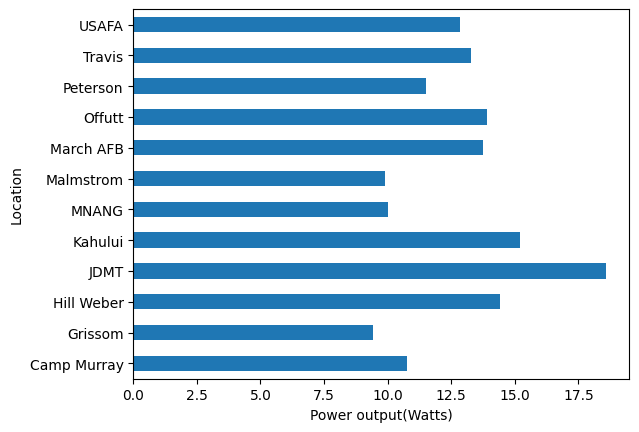

In [54]:
#average PolyPower Per location
print(df.groupby(['Location'])['PolyPwr'].mean())

barChartdf = df.groupby(['Location'])['PolyPwr'].mean()

ax = barChartdf.plot.barh(x='PolyPwr', y='Location')
plt.xlabel("Power output(Watts)")

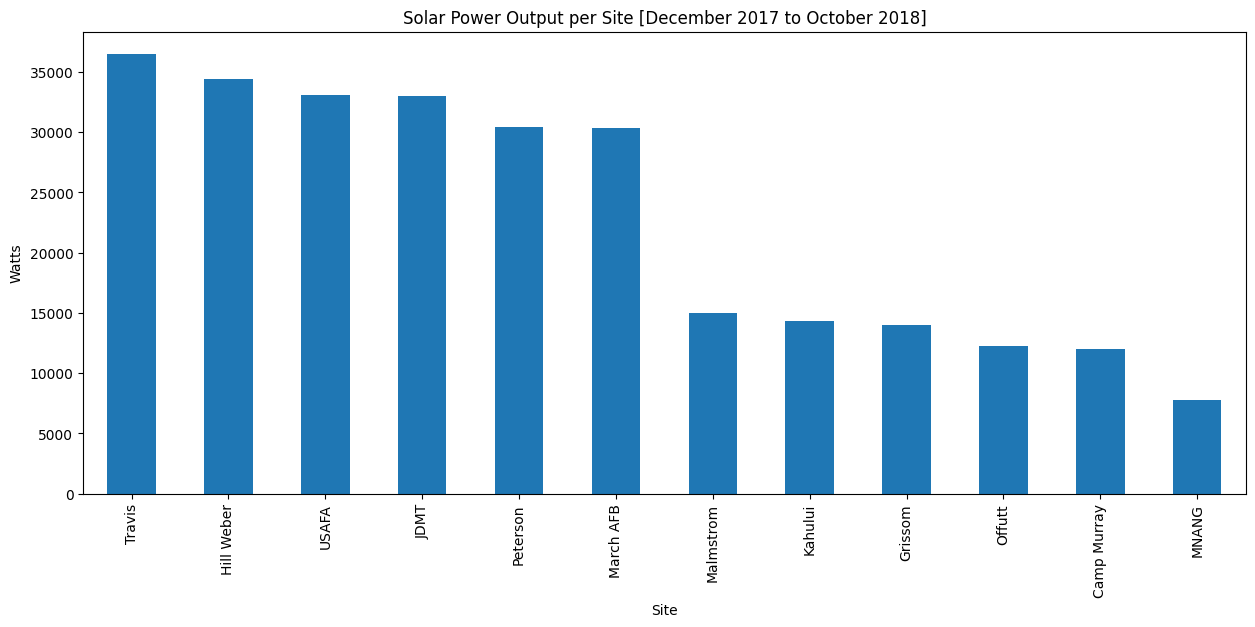

In [67]:
site_tot = df.groupby('Location')['PolyPwr'].sum()
site_tot = site_tot.sort_values(ascending=False)
site_tot.plot(figsize=(15, 6), kind='bar', legend=False)
plt.title('Solar Power Output per Site [December 2017 to October 2018]')
plt.xlabel('Site')
plt.ylabel('Watts')

plt.show()

In [22]:
#filter visiblity and cloud ceiling and re check correlation 
tempDF = df[df["Visibility"] < 10]
tempDF = tempDF[tempDF["Cloud.Ceiling"] < 722]
#tempDF.count()
tempDfData = tempDF[['Altitude','Humidity','PolyPwr','AmbientTemp','Wind.Speed','Visibility','Pressure','Cloud.Ceiling','Latitude']].copy()
print(tempDfData.dtypes)
tempDfData.corr()[['PolyPwr']].sort_values(by='PolyPwr', ascending=False)


Altitude           int64
Humidity         float64
PolyPwr          float64
AmbientTemp      float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
Latitude         float64
dtype: object


,PolyPwr
PolyPwr,1.000000
AmbientTemp,0.496217
Cloud.Ceiling,0.247949
Wind.Speed,0.157768
Visibility,0.115803
Pressure,0.069662
Altitude,-0.070740
Latitude,-0.359641
Humidity,-0.379519


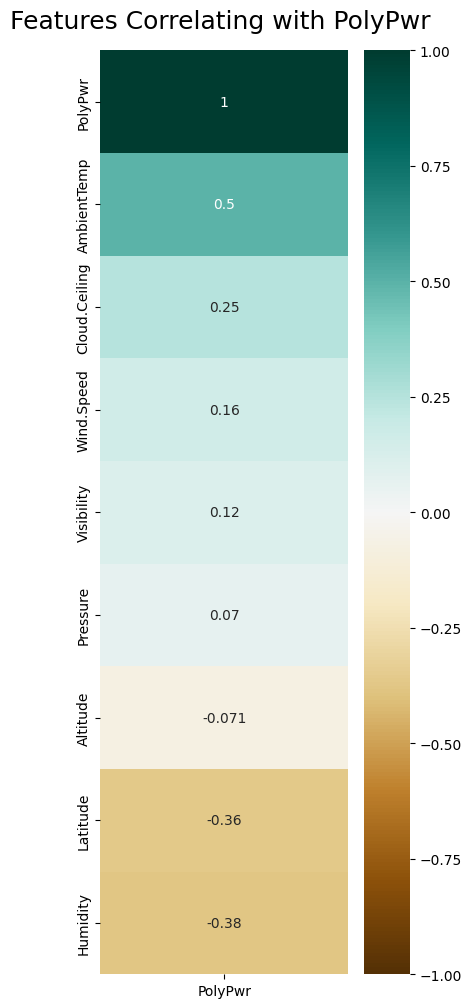

In [58]:
plt.figure(figsize=(4, 12))
heatmap = sns.heatmap(tempDfData.corr()[['PolyPwr']].sort_values(by='PolyPwr', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with PolyPwr ', fontdict={'fontsize':18}, pad=16);

In [69]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Year'] = df['Date'].dt.year
df['month_year'] = df['Date'].dt.strftime('%m-%Y')

In [70]:
# group the dataframe by year and month
grouped_df = df.groupby('month_year')['PolyPwr'].sum().reset_index()

# convert the date column to a datetime object
grouped_df['date'] = pd.to_datetime(grouped_df['month_year'], format='%m-%Y')

# sort the DataFrame by the date column
grouped_df = grouped_df.sort_values(by='date')

# drop the date column since it is no longer needed
grouped_df = grouped_df.drop('date', axis=1)

grouped_df.head()

,month_year,PolyPwr
4,05-2017,1920.36223
6,06-2017,10860.01749
8,07-2017,18459.13417
10,08-2017,17995.83273
12,09-2017,14137.61899


Text(0.5, 1.0, 'Total Solar Power Output [December 2017 to October 2018]')

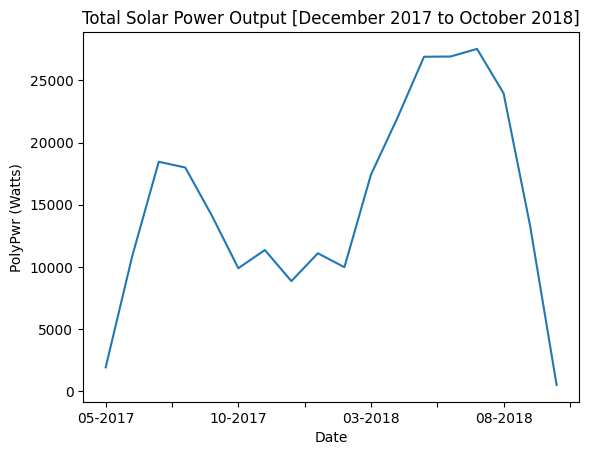

In [71]:
# plot the grouped dataframe
grouped_df.plot(x='month_year', y='PolyPwr', kind='line', legend=None)

# add x and y axis labels
plt.xlabel('Date')
plt.ylabel('PolyPwr (Watts)')
plt.title('Total Solar Power Output [December 2017 to October 2018]')

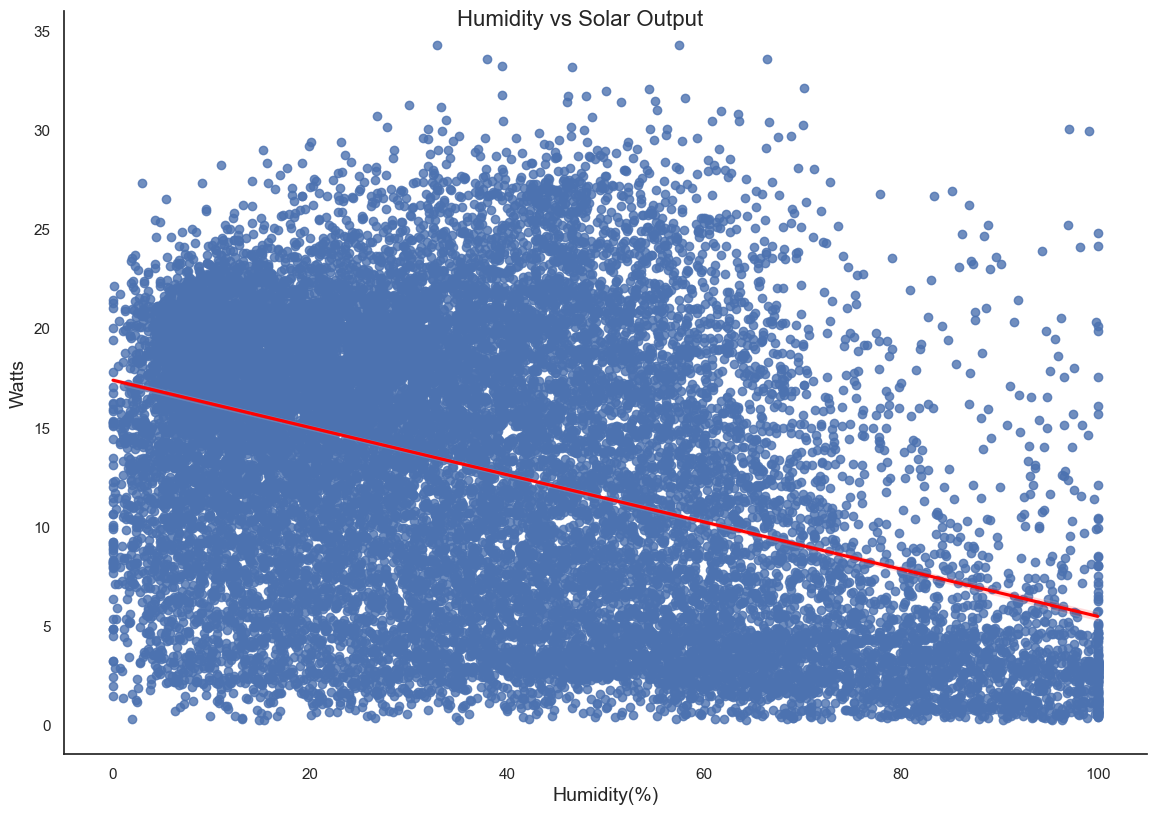

In [74]:
sns.set(style = "white", color_codes = True)
p = sns.lmplot(x='Humidity', y='PolyPwr', data=df, height=8.27, aspect=11.7/8.27, line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
p.fig.suptitle("Humidity vs Solar Output", fontsize=16, fontdict={"weight": "bold"})
p.set_axis_labels( "Humidity(%)" , "Watts" , size = 14)

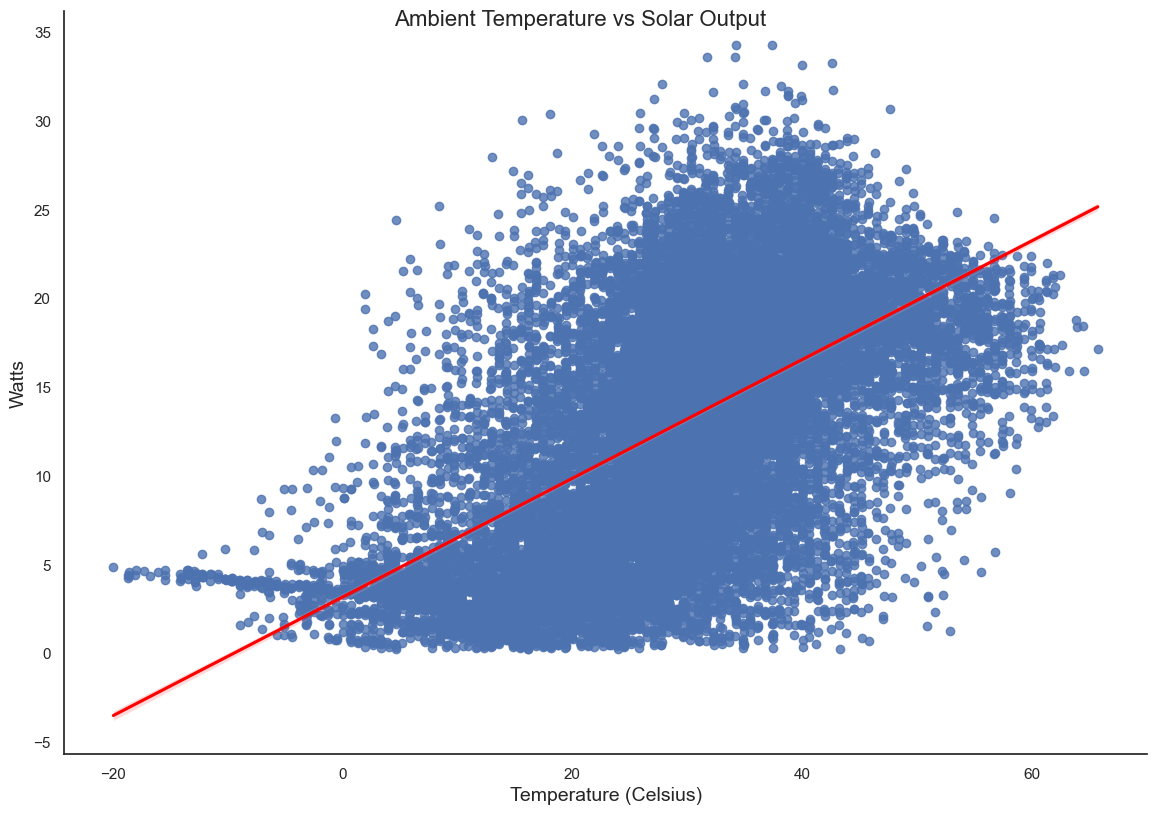

In [75]:
sns.set(style = "white", color_codes = True)
p = sns.lmplot(x='AmbientTemp', y='PolyPwr', data=df, height=8.27, aspect=11.7/8.27, line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
p.fig.suptitle("Ambient Temperature vs Solar Output", fontsize=16, fontdict={"weight": "bold"})
p.set_axis_labels( "Temperature (Celsius)" , "Watts" , size = 14)

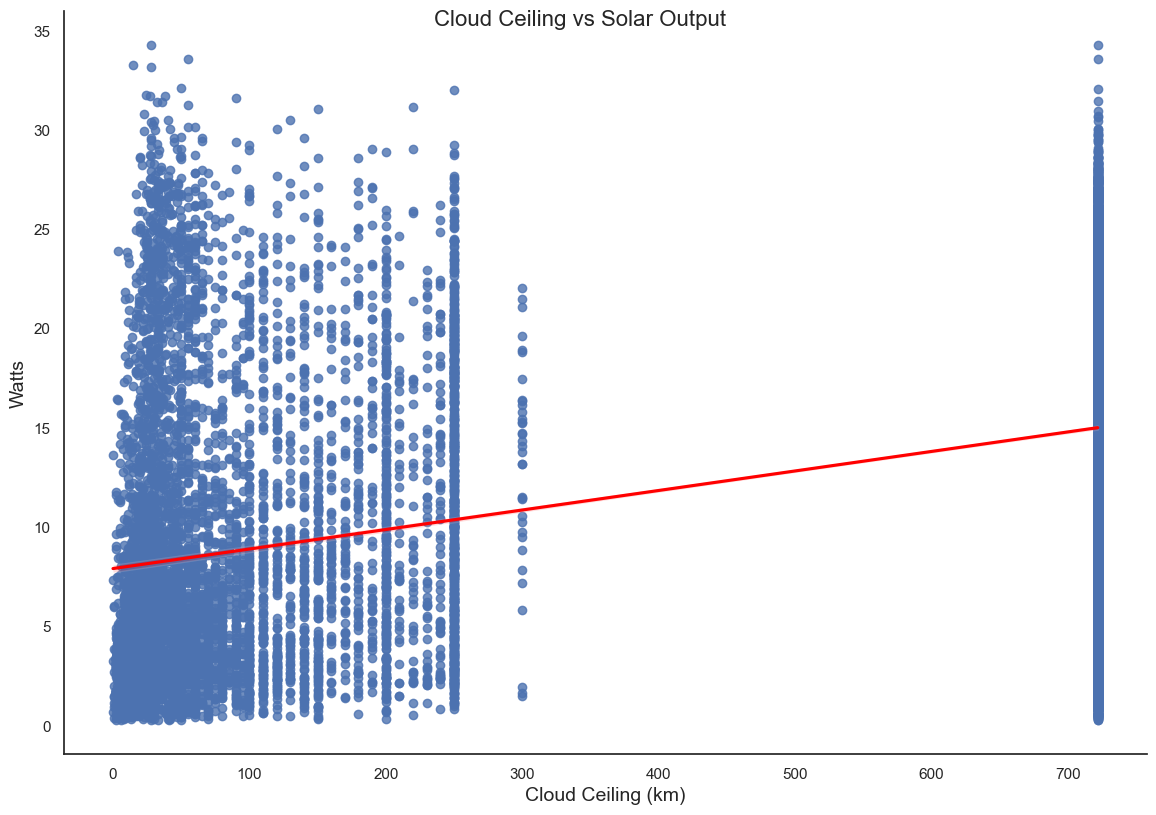

In [76]:
sns.set(style = "white", color_codes = True)
p = sns.lmplot(x='Cloud.Ceiling', y='PolyPwr', data=df, height=8.27, aspect=11.7/8.27, line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
p.fig.suptitle("Cloud Ceiling vs Solar Output", fontsize=16, fontdict={"weight": "bold"})
p.set_axis_labels( "Cloud Ceiling (km)" , "Watts" , size = 14)